In [ ]:
# Working Script

##### NOTE #######
##### Please note that here the colab is built with venmo.csv. We used venmo.pkl on our local machine to conduct further tests #####

In [ ]:
!pip install -U -q PyDrive
!pip install demoji
!pip install afinn
from afinn import Afinn
import demoji
import re
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib

# Import DateTime
import datetime as datetime

In [ ]:
# MACHINE LEARNING
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
#### PY TORCH
!pip install torch torchvision

In [ ]:
# PY TORCH P2
import shutil
import torch
import torchvision
import torch.nn as nn
from torchsummary import summary
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#https://drive.google.com/file/d/16oJh81Ty9l8-safeWelbuEZB1KmbYklR/view?usp=sharing
fileDownloaded = drive.CreateFile({"id":"16oJh81Ty9l8-safeWelbuEZB1KmbYklR"})
fileDownloaded.GetContentFile("venmo.csv")

In [ ]:
#CREATE FINAL DF
df_final = []

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 400)
df = pd.read_csv("venmo.csv")
df_final = df
dumbn = df.columns.tolist()
print(len(df))
df2 = df.groupby(by = 'payment.actor.username')['payment.actor.username'].count()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,9,10,31,32,34,35,38,39,42,43,44,45,74,77,78,83,84,88,126,127,129,130,133,134,137,138,139,140,161,162,163,165,166,169,170,173,174,175,176,179,180,181,183,184,187,188,191,193,194,197,199,200,203,204,205,206,209,211,214) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


98400


In [ ]:
import csv
#from pylearn2.datasets.csv_dataset import CSVDataset
import pickle

#pyln_data = CSVDataset("venmo.csv", one_hot = True, delimiter = ',')
#df_pkl = pickle.dump(pyln_data, open("data/venmo.pkl", 'w'))

with open('venmo.pkl', 'wb') as output_file:
  pickle.dump(df, output_file)


In [ ]:
df_final = df
dumbn = df.columns.tolist()
print(len(df))
df2 = df.groupby(by = 'payment.actor.username')['payment.actor.username'].count()

98400


([<matplotlib.axis.XTick at 0x7faf7f33b7d0>,
 <a list of 15 Text major ticklabel objects>)

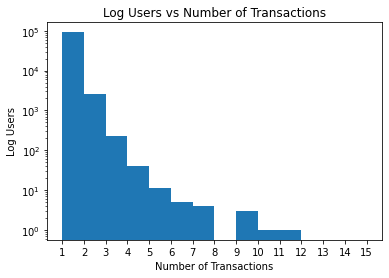

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(df2, bins=np.arange(1, 16))
plt.ylabel('Log Users')
plt.xlabel('Number of Transactions');
plt.title('Log Users vs Number of Transactions')
plt.yscale('log')
plt.xticks(np.arange(1, 16))


... OK (Got response in 0.14 seconds)
Writing emoji data to /root/.demoji/codes.json ...
... OK
0                fuk ya
1        :venmo_dollar:
2                     🎉
3                  Boyz
4                     🥩
              ...      
98395            🙅‍♀️🐶🌑
98396                 📖
98397                🏠💸
98398              Bday
98399                 🧐
Name: payment.note, Length: 98400, dtype: object


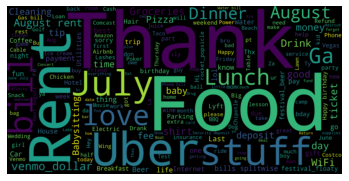

0                                            
1                                            
2                                party popper
3                                            
4                                 cut of meat
                         ...                 
98395    woman gesturing NO new moon dog face
98396                               open book
98397                  house money with wings
98398                                        
98399                       face with monocle
Name: payment.note, Length: 98400, dtype: object
98400
98400
0        0
1        0
2        1
3        0
4        1
        ..
98395    1
98396    1
98397    1
98398    0
98399    1
Name: Has_Emoji, Length: 98400, dtype: int64
0        0.0
1        0.0
2        0.0
3        0.0
4       -1.0
        ... 
98395   -1.0
98396    0.0
98397    0.0
98398    0.0
98399    0.0
Name: payment.note, Length: 98400, dtype: float64
0        0.0
1        0.0
2        0.0
3        0.0
4       -1.0
        .

([<matplotlib.axis.XTick at 0x7faf3f5c4810>,
 <a list of 41 Text major ticklabel objects>)

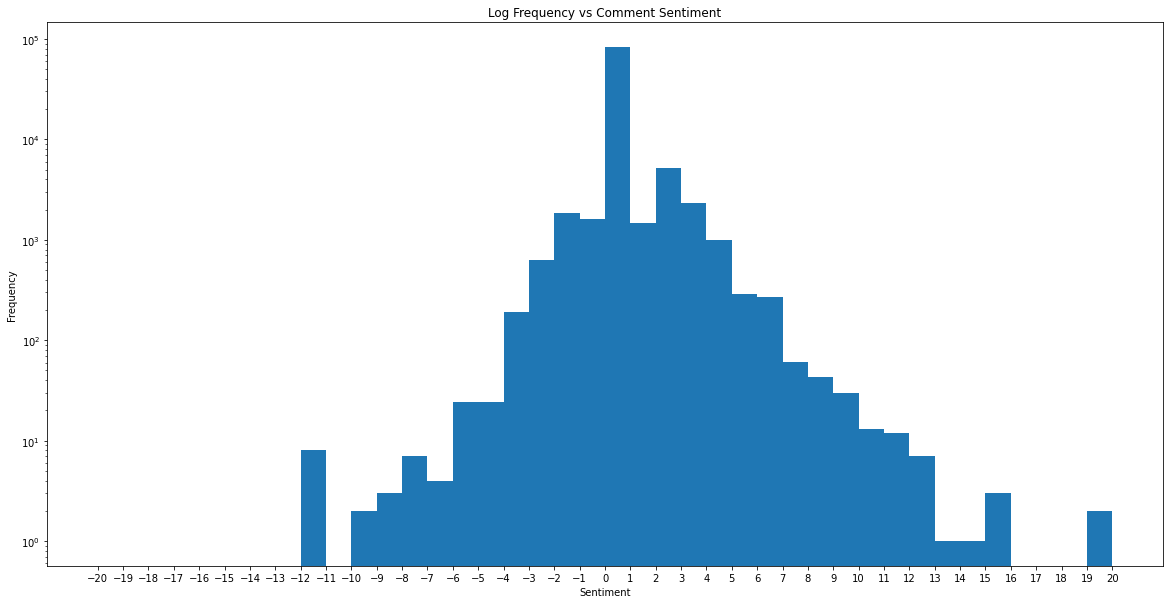

In [ ]:
#Sentiment Analysis
from wordcloud import WordCloud

def noEmoji(t):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',t)

demoji.download_codes()
pd.set_option('display.width', 1000)
print(df['payment.note'])
temp = " ".join(df['payment.note'].astype('str').tolist())
wordcloud = WordCloud(width = 3000, height = 1500).generate(temp)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
df2 = df['payment.note'].apply(lambda x : list(demoji.findall(str(x)).values()))
df2 = df2.apply(lambda x : ' '.join([str(elem) for elem in x]))
print(df2)

df_bin = []
for i in range(len(df2)):
  if df2[i] == "":
    df_bin.append(0)
  else:
    df_bin.append(1)

print(len(df_bin))
t = pd.Series(df_bin)
print(len(t))
df_final.reset_index()
df_final['Has_Emoji'] = t.values
print(df_final['Has_Emoji'])

afinn = Afinn(language = 'en')
df3 = df['payment.note'].apply(lambda x : afinn.score(noEmoji(str(x))))
df2 = df2.apply(afinn.score)
df4 = df2.add(df3)
print(df4)
df_final["Sentiment"] = df4
print(df_final["Sentiment"])

plt.figure(figsize=(20, 10))
plt.hist(df4, bins=np.arange(-20, 21))
plt.ylabel('Frequency')
plt.xlabel('Sentiment');
plt.title('Log Frequency vs Comment Sentiment')
plt.yscale('log')
plt.xticks(np.arange(-20, 21))



In [ ]:
# Fill nulls with 0
df_filled = df_final.fillna(0)

In [ ]:
# Anonymize data for Data Privacy
df_filled_anon_temp = df_filled[df_filled.columns.drop(list(df_filled.filter(regex='name')))]
df_filled_anon = df_filled_anon_temp[df_filled_anon_temp.columns.drop(list(df_filled_anon_temp.filter(regex='picture')))]
df_filled_anon

,_id,date_updated,transfer,app.description,app.site_url,app.image_url,app.id,comments.count,comments.data.0.date_created,comments.data.0.message,comments.data.0.mentions.count,comments.data.0.mentions.data.0.user.about,comments.data.0.mentions.data.0.user.friends_count,comments.data.0.mentions.data.0.user.is_group,comments.data.0.mentions.data.0.user.is_active,comments.data.0.mentions.data.0.user.trust_request,comments.data.0.mentions.data.0.user.email,comments.data.0.mentions.data.0.user.phone,comments.data.0.mentions.data.0.user.friend_status,comments.data.0.mentions.data.0.user.is_blocked,comments.data.0.mentions.data.0.user.id,comments.data.0.mentions.data.0.user.identity,comments.data.0.mentions.data.0.user.date_joined,comments.data.0.id,comments.data.0.user.friends_count,comments.data.0.user.is_group,comments.data.0.user.is_active,comments.data.0.user.trust_request,comments.data.0.user.phone,comments.data.0.user.is_blocked,comments.data.0.user.id,comments.data.0.user.identity,comments.data.0.user.date_joined,comments.data.0.user.about,comments.data.0.user.friend_status,comments.data.0.user.email,comments.data.1.user.about,comments.data.1.user.friends_count,comments.data.1.user.is_group,comments.data.1.user.is_active,comments.data.1.user.trust_request,comments.data.1.user.email,comments.data.1.user.phone,comments.data.1.user.friend_status,comments.data.1.user.is_blocked,comments.data.1.user.id,comments.data.1.user.identity,comments.data.1.user.date_joined,comments.data.1.date_created,comments.data.1.message,comments.data.1.id,comments.data.1.mentions.count,comments.data.1.mentions.data,payment.status,payment.id,payment.date_authorized,payment.merchant_split_purchase.authorization_id,payment.date_completed,payment.target.merchant,payment.target.redeemable_target.type,payment.target.phone,payment.target.user.friends_count,payment.target.user.is_group,payment.target.user.is_active,payment.target.user.trust_request,payment.target.user.phone,payment.target.user.is_blocked,payment.target.user.id,payment.target.user.identity,payment.target.user.date_joined,payment.target.user.about,payment.target.user.friend_status,payment.target.user.email,payment.target.type,payment.target.email,payment.audience,payment.actor.friends_count,payment.actor.is_group,payment.actor.is_active,payment.actor.trust_request,payment.actor.phone,payment.actor.is_blocked,payment.actor.id,payment.actor.identity,payment.actor.date_joined,payment.actor.about,payment.actor.friend_status,payment.actor.email,payment.actor.is_groep,payment.note,payment.amount,payment.action,payment.date_created,payment.date_reminded,note,audience,likes.count,likes.data.0.friends_count,likes.data.0.is_group,likes.data.0.is_active,likes.data.0.trust_request,likes.data.0.phone,likes.data.0.is_blocked,likes.data.0.id,likes.data.0.identity,likes.data.0.date_joined,likes.data.0.about,likes.data.0.friend_status,likes.data.0.email,likes.data.1.about,likes.data.1.friends_count,likes.data.1.is_group,likes.data.1.is_active,likes.data.1.trust_request,likes.data.1.email,likes.data.1.phone,likes.data.1.friend_status,likes.data.1.is_blocked,likes.data.1.id,likes.data.1.identity,likes.data.1.date_joined,mentions.count,mentions.data.0.user.friends_count,mentions.data.0.user.is_group,mentions.data.0.user.is_active,mentions.data.0.user.trust_request,mentions.data.0.user.phone,mentions.data.0.user.is_blocked,mentions.data.0.user.id,mentions.data.0.user.identity,mentions.data.0.user.date_joined,mentions.data.0.user.about,mentions.data.0.user.friend_status,mentions.data.0.user.email,mentions.data.1.user.friends_count,mentions.data.1.user.is_group,mentions.data.1.user.is_active,mentions.data.1.user.trust_request,mentions.data.1.user.phone,mentions.data.1.user.is_blocked,mentions.data.1.user.id,mentions.data.1.user.identity,mentions.data.1.user.date_joined,mentions.data.1.user.about,mentions.data.1.user.friend_status,mentions.data.1.user.email,mentions.data.2.user.friends_count,mentions.data.2.user.date_

In [ ]:
# Look at the list of columns
df_filled_anon_cols = df_filled_anon.columns.tolist()
df_filled_anon_cols

['_id',
 'date_updated',
 'transfer',
 'app.description',
 'app.site_url',
 'app.image_url',
 'app.id',
 'comments.count',
 'comments.data.0.date_created',
 'comments.data.0.message',
 'comments.data.0.mentions.count',
 'comments.data.0.mentions.data.0.user.about',
 'comments.data.0.mentions.data.0.user.friends_count',
 'comments.data.0.mentions.data.0.user.is_group',
 'comments.data.0.mentions.data.0.user.is_active',
 'comments.data.0.mentions.data.0.user.trust_request',
 'comments.data.0.mentions.data.0.user.email',
 'comments.data.0.mentions.data.0.user.phone',
 'comments.data.0.mentions.data.0.user.friend_status',
 'comments.data.0.mentions.data.0.user.is_blocked',
 'comments.data.0.mentions.data.0.user.id',
 'comments.data.0.mentions.data.0.user.identity',
 'comments.data.0.mentions.data.0.user.date_joined',
 'comments.data.0.id',
 'comments.data.0.user.friends_count',
 'comments.data.0.user.is_group',
 'comments.data.0.user.is_active',
 'comments.data.0.user.trust_request',
 'com

In [ ]:
# EDA 2: What percentage of users make the account just for their first transaction
d0 = datetime.datetime.now()

download = df_filled_anon.loc[:, ['payment.actor.id', 'payment.actor.date_joined', 'payment.date_created']]
download["Account Created"] = download["payment.actor.date_joined"].dropna().apply(lambda x: (datetime.datetime.strptime(str(x).split("T")[0], '%Y-%m-%d')))
download["Transaction Created"] = download["payment.date_created"].dropna().apply(lambda x: (datetime.datetime.strptime(str(x).split("T")[0], '%Y-%m-%d')))
download["Days Difference"] = (download["Account Created"] - download["Transaction Created"]).apply(lambda x: int(x.days))

refined_download = download[['payment.actor.id', 'Account Created', 'Transaction Created', "Days Difference"]].dropna(how="any")

count_of_zeroes = len(refined_download[refined_download["Days Difference"] == 0])
count_of_non_zeroes = len(refined_download[refined_download["Days Difference"] != 0])
percen = count_of_zeroes/count_of_non_zeroes * 100

print("Percentage of transactions where the author opened a Venmo account just for that transaction: " + str(round(percen,2)))

Percentage of transactions where the author opened a Venmo account just for that transaction: 1.09


In [ ]:
# EDA 3: Is their a correlation between the time a user has been usign Venmo to the chance they completed their requests:
d0 = datetime.datetime.now()

active = df_filled_anon.loc[:,['payment.actor.id', 'payment.actor.date_joined', 'payment.status']]
active["payment.status"].replace({"settled": 1, "pending": 0, "cancelled": 0}, inplace=True)
active["days"] = active["payment.actor.date_joined"].dropna().apply(lambda x: int((d0 - (datetime.datetime.strptime(str(x).split("T")[0], '%Y-%m-%d'))).days))

refined_active = active[["payment.status", "days"]].dropna(how="any")
grouped = refined_active.groupby(by="payment.status").agg(['mean'])

grouped

,days
,mean
payment.status,
0,1586.410180
1,1728.978083


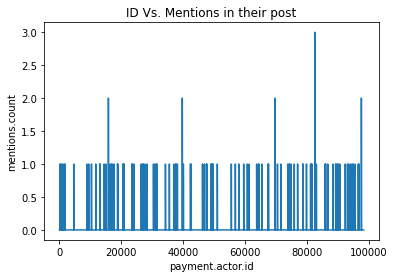

In [ ]:
# EDA 4: How many MENTIONS do we really need?
eda_4 = df_filled_anon[["mentions.count"]]

plt.plot(eda_4["mentions.count"])
plt.xlabel("payment.actor.id")
plt.ylabel("mentions.count")
plt.title("ID Vs. Mentions in their post")
plt.show()
  

In [ ]:
#EDA 4 : OUTCOME - remove all mentions beyond 3:
df_0 = df_filled_anon;
for i in range(4,11):
  df_0 = df_0.drop(["mentions.data." + str(i) + ".user.friends_count", 
             "mentions.data." + str(i) + ".user.is_group", 
             "mentions.data." + str(i) + ".user.is_active", 
             "mentions.data." + str(i) + ".user.trust_request", 
             "mentions.data." + str(i) + ".user.phone", 
             "mentions.data." + str(i) + ".user.is_blocked", 
             "mentions.data." + str(i) + ".user.id", 
             "mentions.data." + str(i) + ".user.identity", 
             "mentions.data." + str(i) + ".user.date_joined", 
             "mentions.data." + str(i) + ".user.about", 
             "mentions.data." + str(i) + ".user.friend_status", 
             "mentions.data." + str(i) + ".user.email"], axis = 1)

df_0

,_id,date_updated,transfer,app.description,app.site_url,app.image_url,app.id,comments.count,comments.data.0.date_created,comments.data.0.message,comments.data.0.mentions.count,comments.data.0.mentions.data.0.user.about,comments.data.0.mentions.data.0.user.friends_count,comments.data.0.mentions.data.0.user.is_group,comments.data.0.mentions.data.0.user.is_active,comments.data.0.mentions.data.0.user.trust_request,comments.data.0.mentions.data.0.user.email,comments.data.0.mentions.data.0.user.phone,comments.data.0.mentions.data.0.user.friend_status,comments.data.0.mentions.data.0.user.is_blocked,comments.data.0.mentions.data.0.user.id,comments.data.0.mentions.data.0.user.identity,comments.data.0.mentions.data.0.user.date_joined,comments.data.0.id,comments.data.0.user.friends_count,comments.data.0.user.is_group,comments.data.0.user.is_active,comments.data.0.user.trust_request,comments.data.0.user.phone,comments.data.0.user.is_blocked,comments.data.0.user.id,comments.data.0.user.identity,comments.data.0.user.date_joined,comments.data.0.user.about,comments.data.0.user.friend_status,comments.data.0.user.email,comments.data.1.user.about,comments.data.1.user.friends_count,comments.data.1.user.is_group,comments.data.1.user.is_active,comments.data.1.user.trust_request,comments.data.1.user.email,comments.data.1.user.phone,comments.data.1.user.friend_status,comments.data.1.user.is_blocked,comments.data.1.user.id,comments.data.1.user.identity,comments.data.1.user.date_joined,comments.data.1.date_created,comments.data.1.message,comments.data.1.id,comments.data.1.mentions.count,comments.data.1.mentions.data,payment.status,payment.id,payment.date_authorized,payment.merchant_split_purchase.authorization_id,payment.date_completed,payment.target.merchant,payment.target.redeemable_target.type,payment.target.phone,payment.target.user.friends_count,payment.target.user.is_group,payment.target.user.is_active,payment.target.user.trust_request,payment.target.user.phone,payment.target.user.is_blocked,payment.target.user.id,payment.target.user.identity,payment.target.user.date_joined,payment.target.user.about,payment.target.user.friend_status,payment.target.user.email,payment.target.type,payment.target.email,payment.audience,payment.actor.friends_count,payment.actor.is_group,payment.actor.is_active,payment.actor.trust_request,payment.actor.phone,payment.actor.is_blocked,payment.actor.id,payment.actor.identity,payment.actor.date_joined,payment.actor.about,payment.actor.friend_status,payment.actor.email,payment.actor.is_groep,payment.note,payment.amount,payment.action,payment.date_created,payment.date_reminded,note,audience,likes.count,likes.data.0.friends_count,likes.data.0.is_group,likes.data.0.is_active,likes.data.0.trust_request,likes.data.0.phone,likes.data.0.is_blocked,likes.data.0.id,likes.data.0.identity,likes.data.0.date_joined,likes.data.0.about,likes.data.0.friend_status,likes.data.0.email,likes.data.1.about,likes.data.1.friends_count,likes.data.1.is_group,likes.data.1.is_active,likes.data.1.trust_request,likes.data.1.email,likes.data.1.phone,likes.data.1.friend_status,likes.data.1.is_blocked,likes.data.1.id,likes.data.1.identity,likes.data.1.date_joined,mentions.count,mentions.data.0.user.friends_count,mentions.data.0.user.is_group,mentions.data.0.user.is_active,mentions.data.0.user.trust_request,mentions.data.0.user.phone,mentions.data.0.user.is_blocked,mentions.data.0.user.id,mentions.data.0.user.identity,mentions.data.0.user.date_joined,mentions.data.0.user.about,mentions.data.0.user.friend_status,mentions.data.0.user.email,mentions.data.1.user.friends_count,mentions.data.1.user.is_group,mentions.data.1.user.is_active,mentions.data.1.user.trust_request,mentions.data.1.user.phone,mentions.data.1.user.is_blocked,mentions.data.1.user.id,mentions.data.1.user.identity,mentions.data.1.user.date_joined,mentions.data.1.user.about,mentions.data.1.user.friend_status,mentions.data.1.user.email,mentions.data.2.user.friends_count,mentions.data.2.user.date_

In [ ]:
# Look at the list of columns
df_0_cols = df_0.columns.tolist()
df_0_cols

['_id',
 'date_updated',
 'transfer',
 'app.description',
 'app.site_url',
 'app.image_url',
 'app.id',
 'comments.count',
 'comments.data.0.date_created',
 'comments.data.0.message',
 'comments.data.0.mentions.count',
 'comments.data.0.mentions.data.0.user.about',
 'comments.data.0.mentions.data.0.user.friends_count',
 'comments.data.0.mentions.data.0.user.is_group',
 'comments.data.0.mentions.data.0.user.is_active',
 'comments.data.0.mentions.data.0.user.trust_request',
 'comments.data.0.mentions.data.0.user.email',
 'comments.data.0.mentions.data.0.user.phone',
 'comments.data.0.mentions.data.0.user.friend_status',
 'comments.data.0.mentions.data.0.user.is_blocked',
 'comments.data.0.mentions.data.0.user.id',
 'comments.data.0.mentions.data.0.user.identity',
 'comments.data.0.mentions.data.0.user.date_joined',
 'comments.data.0.id',
 'comments.data.0.user.friends_count',
 'comments.data.0.user.is_group',
 'comments.data.0.user.is_active',
 'comments.data.0.user.trust_request',
 'com

In [ ]:
## DELETE COLUMNS THAT ARE ALL 0s

df_0_floats = df_0.select_dtypes('float')
l = []
def is_unique(s):
    print(s)
    a = s.to_numpy() # s.values (pandas<0.24)
    print((a[0] == a).all(), "\n")
    return (a[0] == a).all()

for i in df_0_floats.columns:
    if is_unique(df_0[i]):
      l.append(i)

df_0 = df_0.drop(columns = l)
df_0

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
98395    0.0
98396    0.0
98397    0.0
98398    0.0
98399    0.0
Name: transfer, Length: 98400, dtype: float64
True 

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
98395    0.0
98396    0.0
98397    0.0
98398    0.0
98399    0.0
Name: comments.data.0.mentions.count, Length: 98400, dtype: float64
True 

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
98395    0.0
98396    0.0
98397    0.0
98398    0.0
98399    0.0
Name: comments.data.0.mentions.data.0.user.about, Length: 98400, dtype: float64
True 

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
98395    0.0
98396    0.0
98397    0.0
98398    0.0
98399    0.0
Name: comments.data.0.mentions.data.0.user.friends_count, Length: 98400, dtype: float64
True 

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
98395    0.0
98396    0.0
98397    0.0
9

,_id,date_updated,app.description,app.site_url,app.image_url,app.id,comments.count,comments.data.0.date_created,comments.data.0.message,comments.data.0.id,comments.data.0.user.is_group,comments.data.0.user.is_active,comments.data.0.user.is_blocked,comments.data.0.user.id,comments.data.0.user.date_joined,comments.data.0.user.about,payment.status,payment.id,payment.merchant_split_purchase.authorization_id,payment.date_completed,payment.target.redeemable_target.type,payment.target.user.is_group,payment.target.user.is_active,payment.target.user.is_blocked,payment.target.user.id,payment.target.user.date_joined,payment.target.user.about,payment.target.type,payment.audience,payment.actor.is_group,payment.actor.is_active,payment.actor.is_blocked,payment.actor.id,payment.actor.date_joined,payment.actor.about,payment.note,payment.action,payment.date_created,note,audience,likes.count,likes.data.0.is_group,likes.data.0.is_active,likes.data.0.is_blocked,likes.data.0.id,likes.data.0.date_joined,likes.data.0.about,mentions.count,mentions.data.0.user.is_group,mentions.data.0.user.is_active,mentions.data.0.user.is_blocked,mentions.data.0.user.id,mentions.data.0.user.date_joined,mentions.data.0.user.about,mentions.data.1.user.is_group,mentions.data.1.user.is_active,mentions.data.1.user.is_blocked,mentions.data.1.user.id,mentions.data.1.user.date_joined,mentions.data.2.user.date_joined,mentions.data.2.user.is_blocked,mentions.data.2.user.is_group,mentions.data.2.user.is_active,mentions.data.2.user.id,date_created,type,id,Has_Emoji,Sentiment
0,5bb7bd386e52181f090becfa,2018-08-07T02:11:16.000Z,Venmo for iPhone,0,https://venmo.s3.amazonaws.com/oauth/no-image-...,1,0,0,0,0.0,0,0,0,0.0,0,0,settled,2540405007077868184,0.0,2018-08-07T02:11:16,0,False,True,False,2.082497e+18,2016-11-13T07:09:48.000Z,0,user,public,False,True,False,2482900494712832556,2018-05-19T18:00:04.000Z,0,fuk ya,pay,2018-08-07T02:11:16,fuk ya,public,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,2018-08-07T02:11:16.000Z,payment,2540405007614738995,0,0.0
1,5bb7bd386e52181f090becfc,2018-08-07T02:11:16.000Z,Venmo for iPhone,0,https://venmo.s3.amazonaws.com/oauth/no-image-...,1,0,0,0,0.0,0,0,0,0.0,0,0,settled,2540405007379857710,0.0,2018-08-07T02:11:16,0,False,True,False,2.538731e+18,2018-08-04T18:45:48.000Z,0,user,public,False,True,False,2363395470786560486,2017-12-05T20:44:55.000Z,0,:venmo_dollar:,pay,2018-08-07T02:11:16,:venmo_dollar:,public,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,2018-08-07T02:11:16.000Z,payment,2540405007799288777,0,0.0
2,5bb7bd386e52181f090becfe,2018-08-07T02:11:15.000Z,Venmo for Android,0,https://venmo.s3.amazonaws.com/oauth/no-image-...,4,0,0,0,0.0,0,0,0,0.0,0,0,settled,2540404998613762676,0.0,2018-08-07T02:11:15,0,False,True,False,1.921316e+18,2016-04-04T21:51:04.000Z,0,user,public,False,True,False,2278060275531776951,2017-08-10T02:59:07.000Z,0,🎉,pay,2018-08-07T02:11:15,🎉,public,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,2018-08-07T02:11:15.000Z,payment,2540404999133856612,1,0.0
3,5bb7bd386e52181f090bed00,2018-08-07T02:11:15.000Z,Venmo for iPhone,0,https://venmo.s3.amazonaws.com/oauth/no-image-...,1,0,0,0,0.0,0,0,0,0.0,0,0,settled,2540404999972717093,0.0,2018-08-07T02:11:15,0,False,True,False,2.019594e+18,2016-08-18T12:13:17.000Z,0,user,public,False,True,False,2085027231825920983,2016-11-16T18:56:55.000Z,0,Boyz,charge,2018-08-07T02:11:15,Boyz,public,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,2018-08-07T02:11:15.000Z,payment,2540405000417313606,0,0.0
4,5bb7bd386e52181f090bed02,2018-08-07T02:11:15.000Z,Venmo for iPhone,0,https://venmo.s3.amazonaws.com/oauth/no-image-...,1,0,0,0,0.0,0,0,0,0.0,0,0,settled,2540404998253052168,0.0,2018-08-07T02:11:15,0,False,True,False,2.080895e+18,2016-11-11T02:07:34.000Z,0,user,public,False,True,False,2029336009900032272,2016-08-31T22:48:24.000Z,0,🥩,pay,2018-08-07T02:11:15,🥩,public,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,2018-08-07T02:11:15.000Z,payment,254040499869

In [ ]:
#One Hot encoding of Categorical Data
x = df_0
#print(df_0["Sentiment"])
x['app.description'] = x['app.description'].astype('category')
x['payment.status'] = x['payment.status'].astype('category')
x['payment.target.type'] = x['payment.target.type'].astype('category')
x['payment.audience'] = x['payment.audience'].astype('category')
x['payment.action'] = x['payment.action'].astype('category')
x['audience'] = x['audience'].astype('category')
x['type'] = x['type'].astype('category')

x = pd.get_dummies(x, columns=[ 'app.description', 'payment.status', 'payment.target.type', 'payment.audience', 'payment.action', 'audience', 'type'])

df_final = pd.concat([df_0.drop(["payment.actor.id", 'app.description', 'payment.status', 'payment.target.type', 'payment.audience', 'payment.action', 'audience', 'type' ],axis=1), x],axis=1)


df_count = df_0[["payment.actor.id", "_id"]]

df_count = df_count.groupby("payment.actor.id").count()
df_count.columns = ["frequency"]

df_final = df_final.groupby("payment.actor.id").agg('mean')
df_final = df_final.join(df_count, on='payment.actor.id')
df_final = df_final.loc[:,~df_final.columns.duplicated()]
df_final



,app.id,comments.count,comments.data.0.id,comments.data.0.user.id,payment.id,payment.merchant_split_purchase.authorization_id,payment.target.user.id,payment.actor.is_group,payment.actor.is_active,payment.actor.is_blocked,likes.count,likes.data.0.id,mentions.count,mentions.data.0.user.id,mentions.data.1.user.id,mentions.data.2.user.id,id,Has_Emoji,Sentiment,app.description_Makes splitting restaurant/bar bills easy; facilitates payments between people in the group.,app.description_Payouts API,"app.description_Share bills and IOUs. Make sure everyone gets paid back. Totally free for web, iPhone, and Android.",app.description_Venmo for Android,app.description_Venmo for iPhone,app.description_Venmo.com,payment.status_cancelled,payment.status_pending,payment.status_settled,payment.target.type_email,payment.target.type_phone,payment.target.type_redeemable,payment.target.type_user,payment.audience_public,payment.action_charge,payment.action_pay,audience_public,type_payment,frequency
payment.actor.id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
174741189033984477,1213.0,0.0,0.0,0.0,2.532867e+18,0.0,1.269996e+18,False,True,False,0.0,0.0,0.0,0.0,0.0,0.0,2.532867e+18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
318079808569344347,1.0,0.0,0.0,0.0,2.532826e+18,0.0,1.677140e+18,False,True,False,0.0,0.0,0.0,0.0,0.0,0.0,2.532826e+18,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
448726355148800344,4.0,0.0,0.0,0.0,2.532382e+18,0.0,6.420831e+17,False,True,False,0.0,0.0,0.0,0.0,0.0,0.0,2.532382e+18,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
453567588597760705,1.0,0.0,0.0,0.0,2.532812e+18,0.0,2.152288e+18,False,True,False,0.0,0.0,0.0,0.0,0.0,0.0,2.532812e+18,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
526066728828928753,1.0,0.0,0.0,0.0,2.532748e+18,0.0,1.976921e+18,False,True,False,0.0,0.0,0.0,0.0,0.0,0.0,2.532748e+18,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532942358249472750,1.0,0.0,0.0,0.0,2.532947e+18,0.0,1.877162e+18,False,True,False,0.0,0.0,0.0,0.0,0.0,0.0,2.532947e+18,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2532942878343168763,1.0,0.0,0.0,0.0,2.532945e+18,0.0,2.053228e+18,False,True,False,0.0,0.0,0.0,0.0,0.0,0.0,2.532945e+18,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2532943859810304503,1.0,0.0,0.0,0.0,2.532947e+18,0.0,2.182282e+18,False,True,False,0.0,0.0,0.0,0.0,0.0,0.0,2.532947e+18,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [ ]:
df_final = df_final.fillna(0)
print(x.isnull().values.any())
print(df_final.isnull().values.any())

False
False


# **EDA INTO FEATURES START**

app.id 

comments.count 

comments.data.0.id 

comments.data.0.user.id 

payment.id 

payment.merchant_split_purchase.authorization_id 

payment.target.user.id 

payment.actor.is_group 

payment.actor.is_active 

payment.actor.is_blocked 

likes.count 

likes.data.0.id 

mentions.count 

mentions.data.0.user.id 

mentions.data.1.user.id 

mentions.data.2.user.id 

id 

Has_Emoji 

Sentiment 

app.description_Makes splitting restaurant/bar bills easy; facilitates payments between people in the group. 

app.description_Payouts API 

app.description_Share bills and IOUs. Make sure everyone gets paid back. Totally free for web, iPhone, and Android. 

app.description_Venmo for Android 

app.description_Venmo for iPhone 

app.description_Venmo.com 

payment.status_cancelled 

payment.status_pending 

payment.status_settled 

payment.target.type_email 

payment.target.type_phone 

payment.target.type_redeemable 

payment.target.type_user 

payment.audience_public 

payment.action_charge 

pay

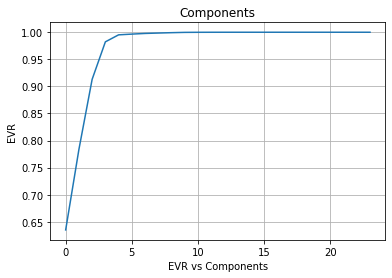

[[-2.27541165e-01  9.83609614e-01  8.61920591e-01 ...  2.37120699e-04
   1.18207545e-04 -1.37160798e-03]
 [-1.81994448e-01 -5.66903991e-01  9.15793170e-02 ...  2.84868338e-04
   1.63414297e-03 -6.13078064e-04]
 [ 1.81134277e+00 -5.10519034e-01  7.60230273e-02 ... -1.71339644e-03
  -4.26578532e-03 -7.63153825e-04]
 ...
 [-2.27541165e-01  9.83609614e-01  8.61920591e-01 ...  2.37120699e-04
   1.18207545e-04 -1.37160798e-03]
 [-1.81994448e-01 -5.66903991e-01  9.15793170e-02 ...  2.84868338e-04
   1.63414297e-03 -6.13078064e-04]
 [-1.92088977e-01  3.13227463e-01 -3.81620859e-01 ...  2.92636681e-04
   4.22985596e-05 -1.46762895e-03]]
76090


In [ ]:
#PCA CODE
label = df_final['frequency']
features = df_final.loc[:, df_final.columns != 'frequency']

for i in features.columns:
  print(i, "\n")
features.set_index(['payment.id'])

features = features.drop(['id', 'payment.id'], axis = 1)

features = features[features.columns.drop(list(features.filter(regex='id')))]

y_train, y_test, x_train, x_test = train_test_split(label, features, test_size=0.2)
for i in features.columns:
  print(i)
  print(features[i].max())
  print('\n')
pca = PCA()
pca.fit(x_train)
evr = pca.explained_variance_ratio_.cumsum()
print(evr)
 

plt.plot(evr)
plt.xlabel("EVR vs Components")
plt.ylabel("EVR")
plt.title("Components")
matplotlib.pyplot.grid()
plt.show()

pca = PCA(n_components=8)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)
print(X_train)
print(len(X_train))


In [ ]:
#### RANDOM FOREST CLASSIFIER
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

print("RANDOM FOREST CLASSIFIER")
print(classification_report(y_test, pred_rfc))

#### SVM Classifier
clf = svm.SVC()
clf.fit(x_train, y_train)
pred_clf = clf.predict(x_test)

print("SVM Classifier")
print(classification_report(y_test, pred_clf))

### NEURAL ENTWORKS
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(x_train, y_train)
pred_mlpc = mlpc.predict(x_test)

print("NEURAL ENTWORKS")
print(classification_report(y_test, pred_mlpc))

RANDOM FOREST CLASSIFIER


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.98      1.00      0.99     18458
           2       0.98      0.39      0.56       512
           3       0.94      0.44      0.60        36
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2

    accuracy                           0.98     19023
   macro avg       0.36      0.23      0.27     19023
weighted avg       0.98      0.98      0.98     19023

SVM Classifier


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.98      1.00      0.99     18458
           2       0.93      0.29      0.45       512
           3       0.00      0.00      0.00        36
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2

    accuracy                           0.98     19023
   macro avg       0.24      0.16      0.18     19023
weighted avg       0.97      0.98      0.97     19023

NEURAL ENTWORKS


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.98      1.00      0.99     18458
           2       0.99      0.27      0.43       512
           3       0.69      0.25      0.37        36
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2

    accuracy                           0.98     19023
   macro avg       0.33      0.19      0.22     19023
weighted avg       0.98      0.98      0.97     19023



In [ ]:
# NEURAL NEWORK
criterion = torch.nn.CrossEntropyLoss()

# **EDA INTO FEATURES END**

Logistic Regression

In [ ]:
class logregmod(torch.nn.Module):
  def __init__(self, input_dim, output_dim):
        super(logregmod, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
  def forward(self, x):
        outputs = self.linear(x)
        return outputs

lr_model = logregmod(8,12)

In [ ]:
# Define loss function
criterion = torch.nn.CrossEntropyLoss();

In [ ]:
lr_input_dim = 8
summary(lr_model.to(device), (1, lr_input_dim))
lr_optimizer = torch.optim.Adam(lr_model.parameters(), lr= 0.001)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 12]             108
Total params: 108
Trainable params: 108
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:

def train_model(model, optimizer, criterion, epochs=5):
    loss_list = []
    accuracy_list = []
    for child in model.children():
      if hasattr(child, 'reset_parameters'):
        child.reset_parameters()
    model.train()
    model.to(device)  
    for i in range(epochs): 
      running_loss = 0.0;
      correct = 0.0;
      total = 0.0;

      labels = 0.0;
      for (data, labels) in zip(X_train, y_train):
        
        flattened = torch.tensor(data)
        arr = np.array([labels])
        labels = torch.from_numpy(arr)

        flattened = flattened.to(device)
        labels = labels.to(device)

        flattened = flattened.view(1, 8) 
        outputs = model(flattened.float())
        optimizer.zero_grad()   
        
        outputs = outputs.view(1, 12) 
           
        loss = criterion(outputs, labels);    

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


      loss_list.append(loss.item())
      accuracy_list.append(correct / total)
      print("EPOCH ", i , " loss: " + str(loss.item()) + "accurayc: " + str(correct / total))

    final_training_accuracy = correct / total    # TODO: Set this to final training accuracy
    final_training_loss = loss.item()        # TODO: Set this to final testing accuracy
    return final_training_loss, final_training_accuracy

In [ ]:
lr_training_loss, lr_training_accuracy = train_model(lr_model, lr_optimizer, criterion)

print("Logistic Regression - the training loss is ", str(lr_training_loss))
print("Logistic Regression - the training accuracy is ", str(lr_training_accuracy))

EPOCH  0  loss: 0.02775593288242817accurayc: 0.9682875542121172
EPOCH  1  loss: 0.027717089280486107accurayc: 0.9698120646602707
EPOCH  2  loss: 0.027713611721992493accurayc: 0.9698120646602707
EPOCH  3  loss: 0.02771349623799324accurayc: 0.9698120646602707
EPOCH  4  loss: 0.027713611721992493accurayc: 0.9698120646602707
Logistic Regression - the training loss is  0.027713611721992493
Logistic Regression - the training accuracy is  0.9698120646602707


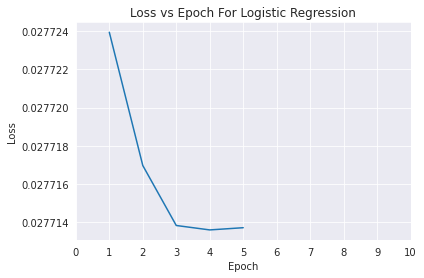

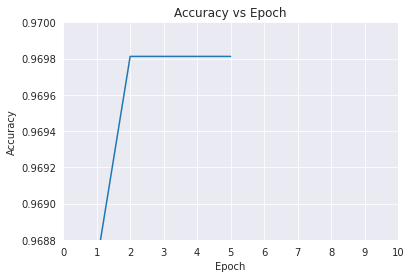

In [ ]:
 from matplotlib import pyplot as plt
import seaborn as sns 

x = range(1,6)
sns.set_style("darkgrid")

y = loss_list
plt.plot(x,y)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch For Logistic Regression")
plt.show()

sns.set_style("darkgrid")

y = accuracy_list
plt.plot(x,y)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.ylim(top=.97)  
plt.ylim(bottom=.9688)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch")
plt.show()

In [ ]:
#EVALUATE MODEL
def test_model(model, criterion):
    model.eval()
    total = 0;
    correct = 0;
    for (data, labels) in zip(X_train, y_train):
        flattened = torch.tensor(data)
        arr = np.array([labels])
        labels = torch.from_numpy(arr)

        flattened = flattened.to(device)
        labels = labels.to(device)

        flattened = flattened.view(1, 8) 
        outputs = model(flattened.float())
        outputs = outputs.view(1, 12) 

        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)

        loss = criterion(outputs, labels) # this is the average loss for one batch of inputs
        loss.backward()

        correct += (predicted == labels).sum().item()


    testing_loss = loss.item()      # TODO: Set this to your testing loss
    testing_accuracy = correct / total     # TODO: Set this to your testing accuracy
    return  testing_loss, testing_accuracy

In [ ]:
lr_testing_loss, lr_testing_accuracy = test_model(lr_model, criterion)

print("Logistic Regression - the testing loss is ", str(lr_testing_loss))
print("Logistic Regression - the testing accuracy is ", str(lr_testing_accuracy))

Logistic Regression - the testing loss is  0.027701320126652718
Logistic Regression - the testing accuracy is  0.9698120646602707


In [ ]:
class FF(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(FF, self).__init__()
    self.lin = nn.Linear(input_dim, hidden_dim)
    self.relu = nn.ReLU()
    self.lin2 = nn.Linear(hidden_dim, hidden_dim)
    self.relu2 = nn.ReLU()
    self.lin3 = nn.Linear(hidden_dim, hidden_dim)
    self.relu3 = nn.ReLU()
    self.lin4 = nn.Linear(hidden_dim, hidden_dim)
    self.relu4 = nn.ReLU()
    self.lin5 = nn.Linear(hidden_dim, output_dim)
  def forward(self, x):
    a = self.lin(x)
    a = self.relu(a)
    a = self.lin2(a)
    a = self.relu2(a)
    a = self.lin3(a)
    a = self.relu3(a)
    a = self.lin4(a)
    a = self.relu4(a)
    a = self.lin5(a)
    return a

fnn_model = FF(8, 500, 12)

In [ ]:
fnn_input_dim = 8
summary(fnn_model.to(device), (1, fnn_input_dim))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 500]           4,500
              ReLU-2               [-1, 1, 500]               0
            Linear-3               [-1, 1, 500]         250,500
              ReLU-4               [-1, 1, 500]               0
            Linear-5               [-1, 1, 500]         250,500
              ReLU-6               [-1, 1, 500]               0
            Linear-7               [-1, 1, 500]         250,500
              ReLU-8               [-1, 1, 500]               0
            Linear-9                [-1, 1, 12]           6,012
Total params: 762,012
Trainable params: 762,012
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 2.91
Estimated Total Size (MB): 2.94
-------------------------------------------

In [ ]:

fnn_epochs = 5              # TODO: set the number of epochs
fnn_optimizer = torch.optim.SGD(fnn_model.parameters(), lr = 0.1)             # TODO: initialize the optimizer
fnn_training_loss, fnn_training_accuracy = train_model(fnn_model, fnn_optimizer, criterion, fnn_epochs)

print("Feedforward Neural Network - the training loss is ", str(fnn_training_loss))
print("Feedforward Neural Network - the training accuracy is ", str(fnn_training_accuracy))

EPOCH  0  loss: 0.03594151884317398accurayc: 0.9696280720199764
EPOCH  1  loss: 0.01996726728975773accurayc: 0.9732290708371665
EPOCH  2  loss: 0.027457907795906067accurayc: 0.9751741358917072
EPOCH  3  loss: 0.020431648939847946accurayc: 0.9751741358917072
EPOCH  4  loss: 0.021130675449967384accurayc: 0.9754369825206992
Feedforward Neural Network - the training loss is  0.021130675449967384
Feedforward Neural Network - the training accuracy is  0.9754369825206992


In [ ]:
fnn_testing_loss, fnn_testing_accuracy = test_model(fnn_model, criterion)

print("Feedforward Neural Network - the testing loss is ", str(fnn_testing_loss))
print("Feedforward Neural Network - the testing accuracy is ", str(fnn_testing_accuracy))

Feedforward Neural Network - the testing loss is  0.02097134478390217
Feedforward Neural Network - the testing accuracy is  0.9757261138125903


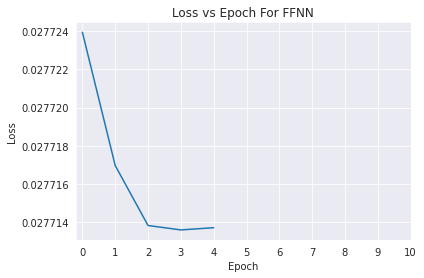

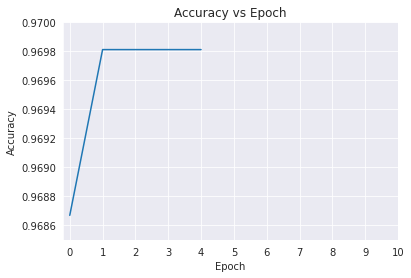

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns 
x = range(0,5)

sns.set_style("darkgrid")

y = loss_list
plt.plot(x,y)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch For FFNN")
plt.show()

sns.set_style("darkgrid")

y = accuracy_list
plt.plot(x,y)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.ylim(top=.97)  
plt.ylim(bottom=.9685)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch")
plt.show()

